In [ ]:
!pip install ultralytics roboflow
from roboflow import Roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 109.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="371EFuAzOfsxkuxlGkcn")
project = rf.workspace("ai-capstone-project-xgxuj").project("final-armyworm-zobmc")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Final-Armyworm-1 in yolov8:: 100%|██████████| 20074/20074 [00:05<00:00, 3637.66it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from ultralytics import YOLO

# Load a lightweight YOLOv8 model (Nano version)
model = YOLO("yolov8n.pt")

# Train the model using your Roboflow dataset
model.train(
    data="/content/Final-Armyworm-1/data.yaml",  # use the exact folder name you saw
    epochs=30,      # you can increase later to 50–100 for better results
    imgsz=640,      # image size
    batch=8         # reduce if Colab gives memory errors
)


Ultralytics 8.3.224 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Final-Armyworm-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a7af16ca780>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

In [5]:
!cp /content/runs/detect/train/weights/best.pt /content/faw_model_untrained.pt


In [11]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
!ls "/content/drive/MyDrive/AI Capstone Project/"

faw_model_trained.pt  predictions_trained  predictions_untrained


In [8]:
model.predict(
    source="/content/Final-Armyworm-1/test/images",
    save=True,
    conf=0.25
)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1292 /content/Final-Armyworm-1/test/images/012530E2-60C5-457B-B452-EE4F85B4A002-20_16_11_jpeg_jpg.rf.2821d758bc20af21f101e0c33487149c.jpg: 640x640 1 fall-armyworm-frass, 1 fall-armyworm-larval-damage, 8.1ms
image 2/1292 /content/Final-Armyworm-1/test/images/052B05C2-D0CD-46E6-9F5B-B8F59A8A5131-12_58_13_jpeg_jpg.rf.71c449b0e0f0ff2333ed51c8021dda81.jpg: 640x640 1 fall-armyworm-larval-damage, 7.3ms
image 3/1292 /content/Final-Armyworm-1/test/image

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '-', 1: 'Fall-Armyworm', 2: 'fall-armyworm', 3: 'fall-armyworm-egg', 4: 'fall-armyworm-frass', 5: 'fall-armyworm-larva', 6: 'fall-armyworm-larval-damage', 7: 'healthy-maize', 8: 'maize-streak-disease'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
  

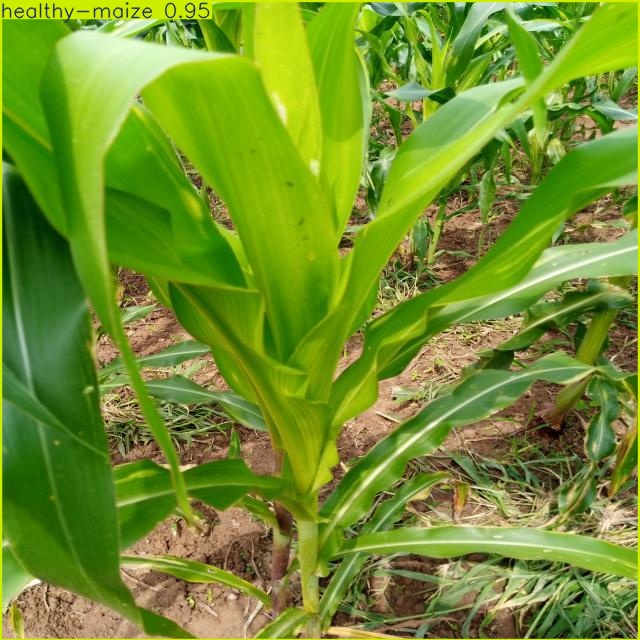

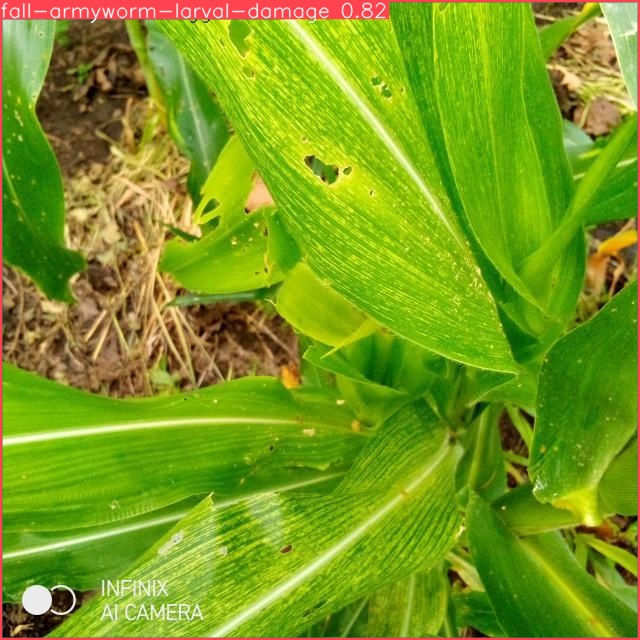

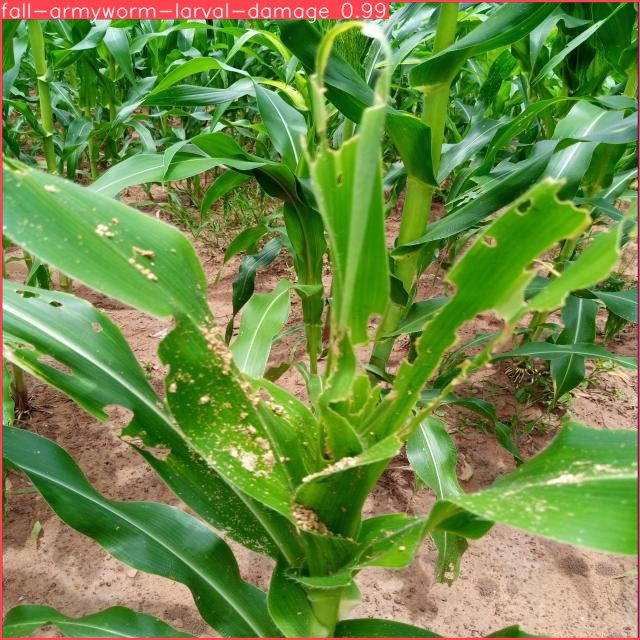

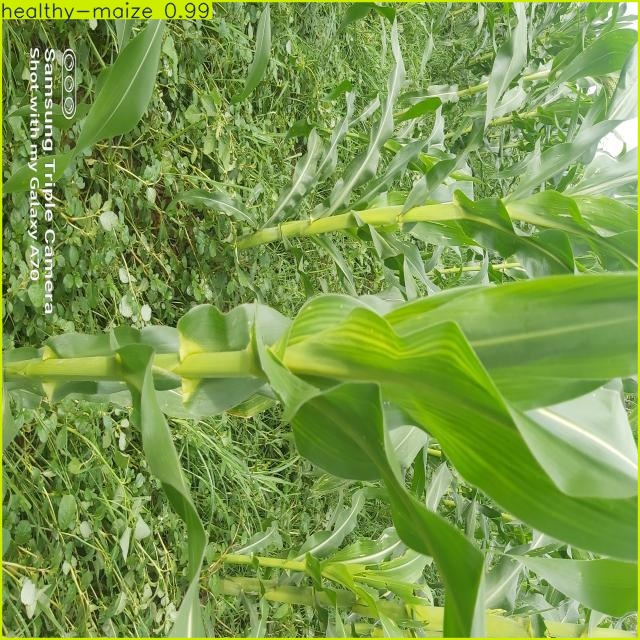

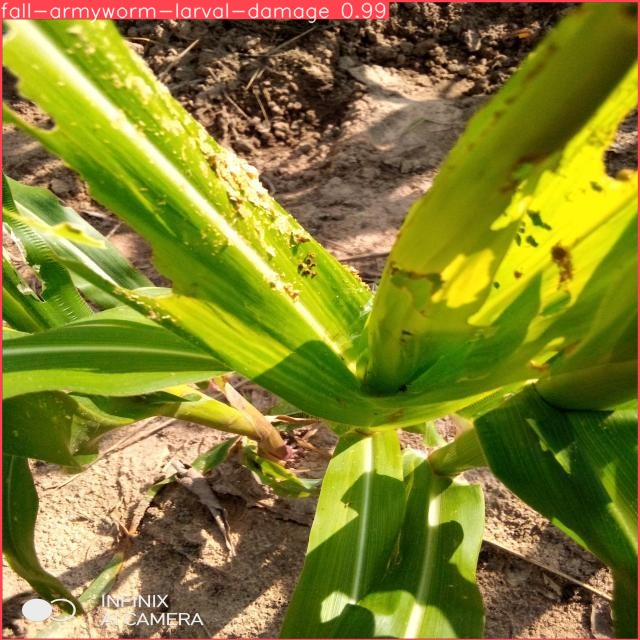

In [9]:
from IPython.display import Image, display
import glob

# Display the first 5 prediction results
for image_path in glob.glob('/content/runs/detect/predict/*.jpg')[:5]:
    display(Image(filename=image_path))


In [12]:
!mkdir -p "/content/drive/MyDrive/AI Capstone Project/predictions_untrained"


In [13]:
!cp -r /content/runs/detect/predict/* "/content/drive/MyDrive/AI Capstone Project/predictions_untrained/"


In [14]:
!ls "/content/drive/MyDrive/AI Capstone Project/predictions_untrained"


012530E2-60C5-457B-B452-EE4F85B4A002-20_16_11_jpeg_jpg.rf.2821d758bc20af21f101e0c33487149c.jpg
052B05C2-D0CD-46E6-9F5B-B8F59A8A5131-12_58_13_jpeg_jpg.rf.71c449b0e0f0ff2333ed51c8021dda81.jpg
054CE86C-2C9C-4C1F-BCF4-7D584B3EA953-22_17_21_jpeg_jpg.rf.8ee5d490b62966890959a07b8ad642a4.jpg
05B3334A-9FA5-438D-A941-B783D918B796-15_40_42_jpeg_jpg.rf.a1097d8951c9519e99e959a06b1b3408.jpg
05C5C8D8-4E4C-48D8-A25F-51BB15A4CFEB-15_35_16_jpeg_jpg.rf.e843cd8869154abcff6fb2c6e67d11e1.jpg
065E1543-BC38-4F39-B963-C1E224D2827F-14_37_29_jpeg_jpg.rf.e4c19774d4a73f268c72c512e86ed816.jpg
06920296-0616-4265-BF27-DA2C694FEFE0-22_16_37_jpeg_jpg.rf.60eba92429de9cecbaea3fea5578bfcc.jpg
0753A77E-AA09-4A8A-8CC6-07EC0CD96BA8-12_8_17_jpeg_jpg.rf.1cef2debb7c0c4bc66ae2e98f180dda2.jpg
0753A77E-AA09-4A8A-8CC6-07EC0CD96BA8-12_8_17_jpeg_jpg.rf.9e2935bba7b4750a6fa7c281a4df7c52.jpg
076383CD-DCE9-46AF-99D9-C235ADF77BB5-10_14_56_jpeg_jpg.rf.e524e3214d2f225b8dd6dd26e6ca148c.jpg
077A8C5F-AB87-478B-8763-B756BD47275A-8_23_51_jpeg_jp

In [15]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="371EFuAzOfsxkuxlGkcn")
project = rf.workspace("ai-capstone-project-xgxuj").project("fall-armyworm-spqzf")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fall-armyworm-1 in yolov8:: 100%|██████████| 19680/19680 [00:13<00:00, 1463.30it/s]


In [17]:
!ls /content


drive		 faw_model_untrained.pt  runs	      yolo11n.pt
fall-armyworm-1  Final-Armyworm-1	 sample_data  yolov8n.pt


In [1]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="/content/fall-armyworm-1/data.yaml",  # ✅ Corrected path
    epochs=30,
    imgsz=640,
    batch=8
)


New https://pypi.org/project/ultralytics/8.3.225 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.224 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fall-armyworm-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opse

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c1b7bf00200>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [2]:
!cp /content/runs/detect/train4/weights/best.pt "/content/drive/MyDrive/AI Capstone Project/faw_model_trained.pt"


In [3]:
model.predict(
    source="/content/fall-armyworm-1/test/images",
    save=True,
    conf=0.25
)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1271 /content/fall-armyworm-1/test/images/012530E2-60C5-457B-B452-EE4F85B4A002-20_16_11_jpeg_jpg.rf.3a84c44eb0cd298988047ecda256a12e.jpg: 640x640 1 fall-armyworm-frass, 1 fall-armyworm-larval-damage, 8.7ms
image 2/1271 /content/fall-armyworm-1/test/images/052B05C2-D0CD-46E6-9F5B-B8F59A8A5131-12_58_13_jpeg_jpg.rf.2d82bbeeec355880d58cf3de9e21f59a.jpg: 640x640 1 fall-armyworm-larval-damage, 7.3ms
image 3/1271 /content/fall-armyworm-1/test/images/0

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'fall-armyworm-egg', 1: 'fall-armyworm-frass', 2: 'fall-armyworm-larva', 3: 'fall-armyworm-larval-damage', 4: 'healthy-maize', 5: 'maize-streak-disease'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 2, 2],
         [0, 3, 

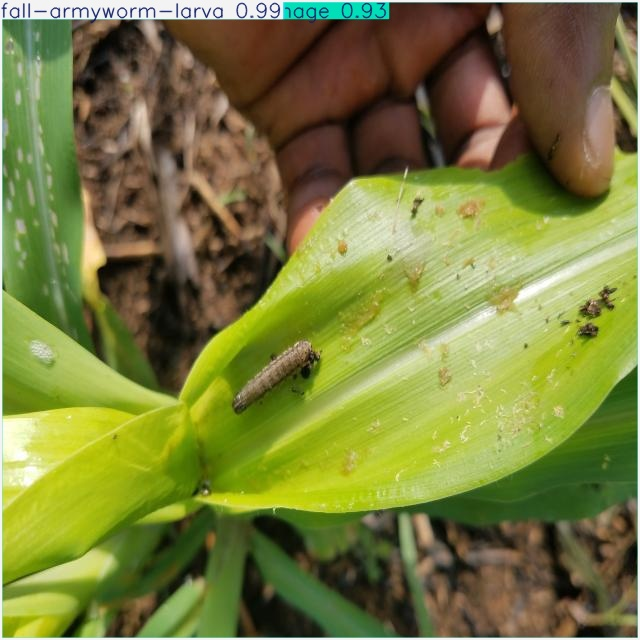

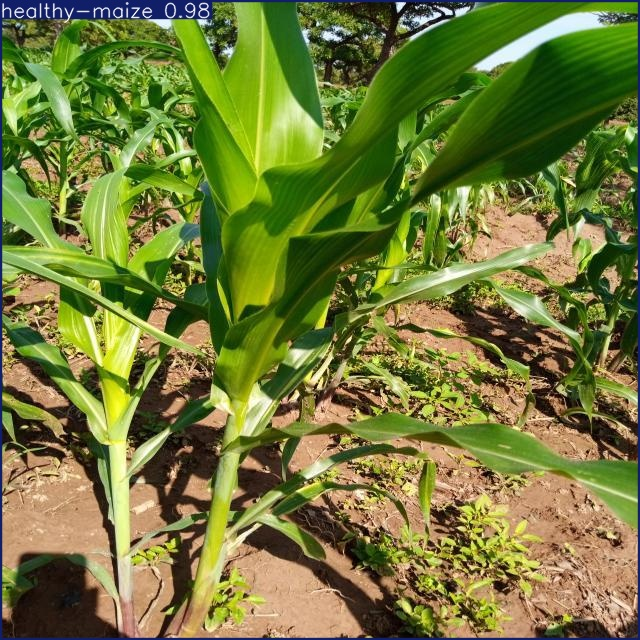

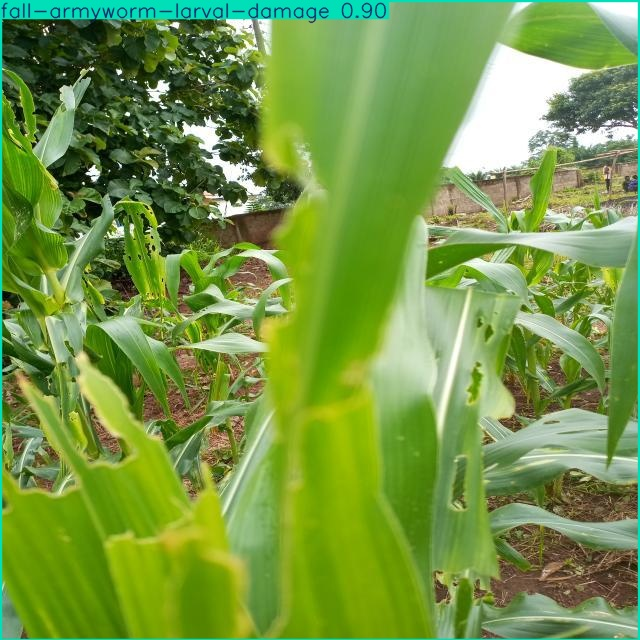

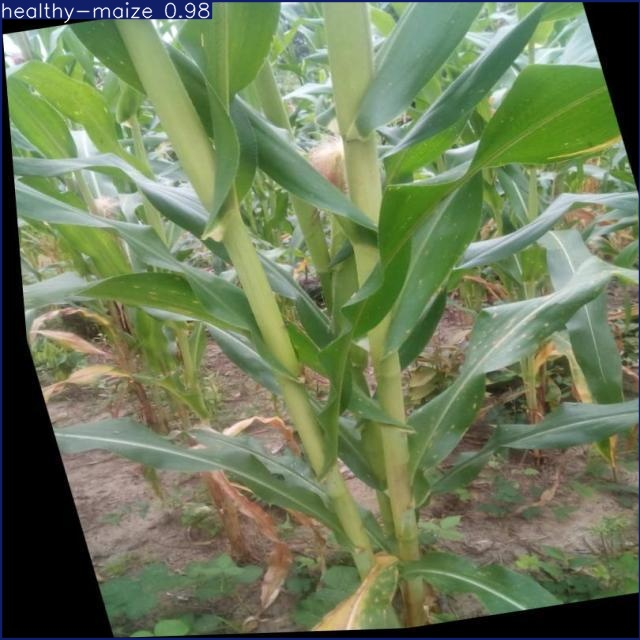

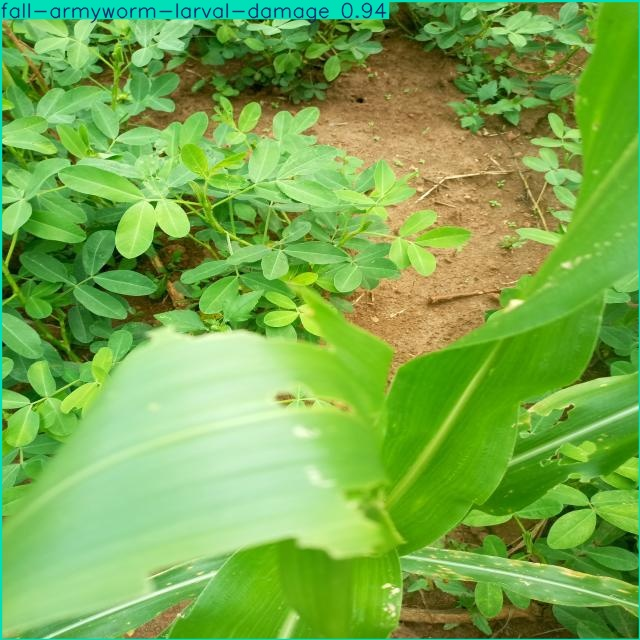

In [4]:
from IPython.display import Image, display
import glob

for image_path in glob.glob('/content/runs/detect/predict2/*.jpg')[:5]:
    display(Image(filename=image_path))


In [5]:
!mkdir -p "/content/drive/MyDrive/AI Capstone Project/predictions_trained"
!cp -r /content/runs/detect/predict2/* "/content/drive/MyDrive/AI Capstone Project/predictions_trained/"


In [6]:
%%writefile app.py
import streamlit as st
from ultralytics import YOLO
from PIL import Image

# Load your trained model
model = YOLO("/content/drive/MyDrive/AI Capstone Project/faw_model_trained.pt")

st.title("🌽 Fall Armyworm Early Detection System")
st.write("Upload a maize leaf image to detect Fall Armyworm or related conditions.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])
if uploaded_file:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_container_width=True)

    if st.button("Detect"):
        results = model.predict(image, conf=0.25)
        st.image(results[0].plot(), caption="Detection Result", use_container_width=True)


Writing app.py


In [8]:
!apt-get install nodejs -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  javascript-common libc-ares2 libjs-highlight.js libnode72 nodejs-doc
Suggested packages:
  apache2 | lighttpd | httpd npm
The following NEW packages will be installed:
  javascript-common libc-ares2 libjs-highlight.js libnode72 nodejs nodejs-doc
0 upgraded, 6 newly installed, 0 to remove and 41 not upgraded.
Need to get 13.7 MB of archives.
After this operation, 54.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 javascript-common all 11+nmu1 [5,936 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libjs-highlight.js all 9.18.5+dfsg1-1 [367 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libc-ares2 amd64 1.18.1-1ubuntu0.22.04.3 [45.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libnode72 amd64 12.22.9~dfsg-1ubuntu3.6 [10.8 MB]


In [9]:
!npm install -g localtunnel


internal/modules/cjs/loader.js:818
  throw err;
  ^

Error: Cannot find module 'node:path'
Require stack:
- /tools/node/lib/node_modules/npm/lib/cli.js
- /tools/node/lib/node_modules/npm/bin/npm-cli.js
    at Function.Module._resolveFilename (internal/modules/cjs/loader.js:815:15)
    at Function.Module._load (internal/modules/cjs/loader.js:667:27)
    at Module.require (internal/modules/cjs/loader.js:887:19)
    at require (internal/modules/cjs/helpers.js:85:18)
    at Object.<anonymous> (/tools/node/lib/node_modules/npm/lib/cli.js:2:18)
    at Module._compile (internal/modules/cjs/loader.js:999:30)
    at Object.Module._extensions..js (internal/modules/cjs/loader.js:1027:10)
    at Module.load (internal/modules/cjs/loader.js:863:32)
    at Function.Module._load (internal/modules/cjs/loader.js:708:14)
    at Module.require (internal/modules/cjs/loader.js:887:19) {
  code: 'MODULE_NOT_FOUND',
  requireStack: [
    '/tools/node/lib/node_modules/npm/lib/cli.js',
    '/tools/node/lib/node

In [10]:
!apt-get remove -y nodejs


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libc-ares2 libjs-highlight.js libnode72 nodejs-doc
Use 'apt autoremove' to remove them.
The following packages will be REMOVED:
  nodejs
0 upgraded, 0 newly installed, 1 to remove and 41 not upgraded.
After this operation, 929 kB disk space will be freed.
(Reading database ... 125449 files and directories currently installed.)
Removing nodejs (12.22.9~dfsg-1ubuntu3.6) ...
Processing triggers for man-db (2.10.2-1) ...


In [11]:
!curl -fsSL https://deb.nodesource.com/setup_18.x | bash -
!apt-get install -y nodejs


2025-11-04 14:29:18 - 
                            DEPRECATION WARNING                            
Node.js 18.x is no longer actively supported!
You will not receive security or critical stability updates for this version.

You should migrate to a supported version of Node.js as soon as possible.

Please see https://nodesource.com/products/distributions for details about which
version may be appropriate for you.

The NodeSource Node.js distributions site contains
information both about supported versions of Node.js and N|Solid supported Linux
distributions. To learn more about usage, see:
https://nodesource.com/products/distributions


Continuing in 10 seconds ...

2025-11-04 14:29:28 - Installing pre-requisites
Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-

In [12]:
!apt-get remove -y nodejs libnode72


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package 'nodejs' is not installed, so not removed
The following packages were automatically installed and are no longer required:
  libc-ares2 libjs-highlight.js
Use 'apt autoremove' to remove them.
The following packages will be REMOVED:
  libnode72
0 upgraded, 0 newly installed, 1 to remove and 47 not upgraded.
After this operation, 41.2 MB disk space will be freed.
(Reading database ... 125213 files and directories currently installed.)
Removing libnode72:amd64 (12.22.9~dfsg-1ubuntu3.6) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.8) ...
/sbin/ldconfig.real: /usr/local/lib/libtcm_debug.so.1 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtcm.so.1 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_adapter_level_zero.so.0 is not a symbo

In [13]:
!apt-get autoremove -y
!apt-get autoclean


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages will be REMOVED:
  libc-ares2 libjs-highlight.js
0 upgraded, 0 newly installed, 2 to remove and 47 not upgraded.
After this operation, 2,276 kB disk space will be freed.
(Reading database ... 125206 files and directories currently installed.)
Removing libc-ares2:amd64 (1.18.1-1ubuntu0.22.04.3) ...
Removing libjs-highlight.js (9.18.5+dfsg1-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.8) ...
/sbin/ldconfig.real: /usr/local/lib/libtcm_debug.so.1 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtcm.so.1 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_adapter_level_zero.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libur_adapter_opencl.so.0 is not a symbolic link



In [14]:
!curl -fsSL https://deb.nodesource.com/setup_18.x | bash -
!apt-get install -y nodejs


2025-11-04 14:32:26 - 
                            DEPRECATION WARNING                            
Node.js 18.x is no longer actively supported!
You will not receive security or critical stability updates for this version.

You should migrate to a supported version of Node.js as soon as possible.

Please see https://nodesource.com/products/distributions for details about which
version may be appropriate for you.

The NodeSource Node.js distributions site contains
information both about supported versions of Node.js and N|Solid supported Linux
distributions. To learn more about usage, see:
https://nodesource.com/products/distributions


Continuing in 10 seconds ...

2025-11-04 14:32:36 - Installing pre-requisites
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://deb.nodesource.com/node_18.x nodistro InRe

In [15]:
!node -v
!npm -v


v18.20.8
10.8.2


In [16]:
!npm install -g localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
added 22 packages in 2s
⠋
⠋3 packages are looking for funding
⠋  run `npm fund` for details
⠋

In [18]:
!pip uninstall -y streamlit
!npm uninstall -g localtunnel


⠙
removed 22 packages in 417ms
⠙

In [19]:
!pip install streamlit


  Using cached streamlit-1.51.0-py3-none-any.whl.metadata (9.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 126.0 MB/s eta 0:00:00


In [20]:
!curl -fsSL https://deb.nodesource.com/setup_18.x | bash -
!apt-get install -y nodejs
!npm install -g localtunnel


2025-11-04 14:45:11 - 
                            DEPRECATION WARNING                            
Node.js 18.x is no longer actively supported!
You will not receive security or critical stability updates for this version.

You should migrate to a supported version of Node.js as soon as possible.

Please see https://nodesource.com/products/distributions for details about which
version may be appropriate for you.

The NodeSource Node.js distributions site contains
information both about supported versions of Node.js and N|Solid supported Linux
distributions. To learn more about usage, see:
https://nodesource.com/products/distributions


Continuing in 10 seconds ...

2025-11-04 14:45:21 - Installing pre-requisites
Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
H

In [25]:
!pip install streamlit pyngrok


In [26]:
!streamlit run app.py &>/content/logs.txt &


In [27]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
public_url


ERROR:pyngrok.process.ngrok:t=2025-11-04T15:05:41+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-11-04T15:05:41+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"


PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [5]:
from ultralytics import YOLO

# Load your trained YOLOv8 model
model = YOLO("faw_model_trained.pt")

# Export to ONNX
model.export(format="onnx", imgsz=640, dynamic=True, simplify=True)


ModuleNotFoundError: No module named 'ultralytics'

In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.0 MB/s eta 0:00:00


In [7]:
from pyngrok import ngrok
import getpass

# Ask for the ngrok authtoken
# You can find your authtoken on the ngrok dashboard: https://dashboard.ngrok.com/get-started/your-authtoken
print("Enter your ngrok authtoken:")
authtoken = getpass.getpass()

# Set the authtoken
ngrok.set_auth_token(authtoken)

# Connect to the Streamlit app running on port 8501
public_url = ngrok.connect(8501)
print(f"Streamlit app running at: {public_url}")

Enter your ngrok authtoken:
··········
Streamlit app running at: NgrokTunnel: "https://odell-superprecarious-calorimetrically.ngrok-free.dev" -> "http://localhost:8501"


In [13]:
from ultralytics import YOLO

# Load your trained YOLOv8 model from Google Drive
model = YOLO("/content/drive/MyDrive/AI Capstone Project/faw_model_trained.pt")

# Export to ONNX
model.export(format="onnx", imgsz=640, dynamic=True, simplify=True)

Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/AI Capstone Project/faw_model_trained.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.71', 'onnxruntime'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 3.3s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.72...
ONNX: export success ✅ 10.9s, saved as '/content/drive/MyDrive/AI Capstone Project/faw_model_trained.onnx' (11.7 MB)

Export complete (11.8s)
Results saved to /content/drive/M

'/content/drive/MyDrive/AI Capstone Project/faw_model_trained.onnx'

In [10]:
!ls "/content/drive/MyDrive/AI Capstone Project/"

ls: cannot access '/content/drive/MyDrive/AI Capstone Project/': No such file or directory


In [3]:
!pip install pyngrok

In [31]:
from google.colab import files
files.download("/content/drive/MyDrive/AI Capstone Project/faw_model_trained.pt")   # your model
files.download("/content/app.py")                 # your app file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>